In [3]:
import csv
import pandas as pd
from random import sample 

#Dataset is a list of details of 50 startups
df = pd.read_csv('50_Startups.csv')
df = pd.DataFrame(df)
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [4]:
#Description of the dataset and its variables
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [5]:
#simple random sampling
no_of_elements = 30
random_index = sample(range(df.shape[0]), no_of_elements)
print(random_index)
df_sample = df.iloc[random_index]
print(df_sample)

[48, 10, 19, 29, 25, 21, 26, 28, 20, 16, 4, 46, 0, 11, 9, 45, 17, 30, 31, 43, 36, 33, 5, 3, 35, 32, 15, 42, 22, 13]
    R&D Spend  Administration  Marketing Spend       State     Profit
48     542.05        51743.15             0.00    New York   35673.41
10  101913.08       110594.11        229160.95     Florida  146121.95
19   86419.70       153514.11             0.00    New York  122776.86
29   65605.48       153032.06        107138.38    New York  101004.64
25   64664.71       139553.16        137962.62  California  107404.34
21   78389.47       153773.43        299737.29    New York  111313.02
26   75328.87       144135.98        134050.07     Florida  105733.54
28   66051.52       182645.56        118148.20     Florida  103282.38
20   76253.86       113867.30        298664.47  California  118474.03
16   78013.11       121597.55        264346.06  California  126992.93
4   142107.34        91391.77        366168.42     Florida  166187.94
46    1315.46       115816.21        297114.

In [10]:

df1 = df["Administration"]
df1 = df1.values.tolist()
print(df1)

[136897.8, 151377.59, 101145.55, 118671.85, 91391.77, 99814.71, 147198.87, 145530.06, 148718.95, 108679.17, 110594.11, 91790.61, 127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58, 114175.79, 153514.11, 113867.3, 153773.43, 122782.75, 105751.03, 99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06, 115641.28, 152701.92, 129219.61, 103057.49, 157693.92, 85047.44, 127056.21, 51283.14, 65947.93, 82982.09, 118546.05, 84710.77, 96189.63, 127382.3, 154806.14, 124153.04, 115816.21, 135426.92, 51743.15, 116983.8]


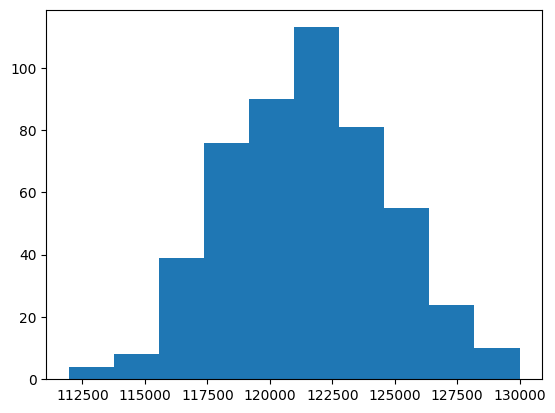

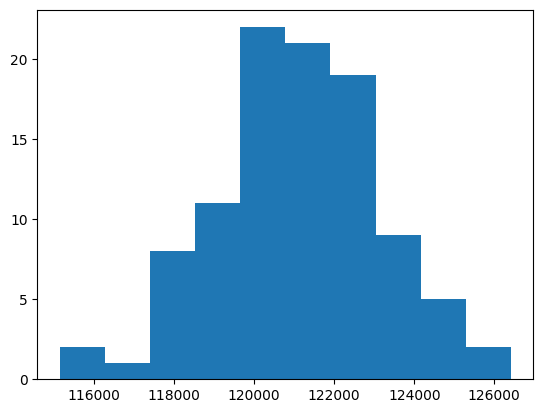

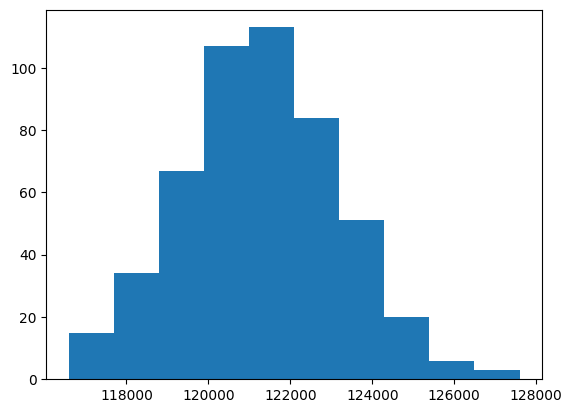

In [13]:
from numpy import mean
from random import sample
from matplotlib import pyplot
import numpy as np

def plot_clt(df1, sample_size, no_of_samples):
    sample_means = []
    for i in range(no_of_samples):
        sample_means.append(np.mean(sample(df1, sample_size)))

    # plot the distribution of sample means
    pyplot.hist(sample_means)
    pyplot.show()

plot_clt(df1,30,500)
plot_clt(df1,40,100)
plot_clt(df1,40,00)


For CI =  0.95  and Sample Size =  40
Actual Mean =  121344.63960000001
Mean of Samples =  121128.7120715
Confidence Interval =  121344.63960000001 +- 487.94329106078607


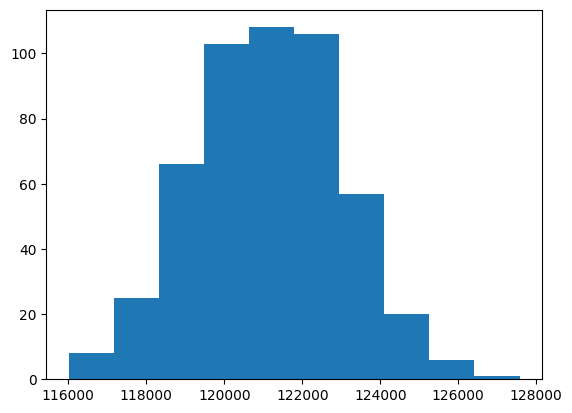


For CI =  0.95  and Sample Size =  30
Actual Mean =  121344.63960000001
Mean of Samples =  121220.95502166664
Confidence Interval =  121344.63960000001 +- 964.1685743419191


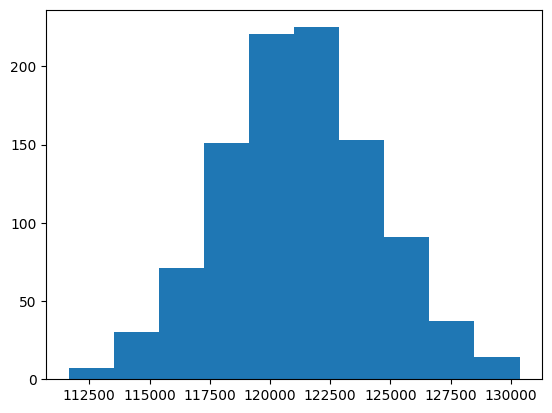


For CI =  0.95  and Sample Size =  40
Actual Mean =  121344.63960000001
Mean of Samples =  121325.24298899999
Confidence Interval =  121344.63960000001 +- 528.5803656451541


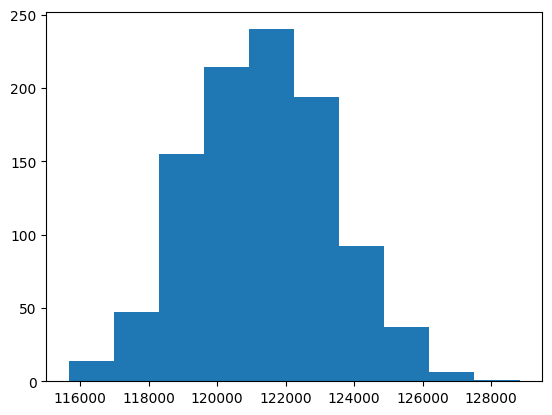

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats as st
import math

def CI(pop, ci, sample_size, no_of_samples):
    print("\nFor CI = ",ci," and Sample Size = ", sample_size)
    pop_mean = np.mean(pop)
    print("Actual Mean = ",pop_mean)
    
    #calculation of using CI
    sample_means = []   #mean of all the samples 
    for i in range(no_of_samples):
        sample_means.append(np.mean(sample(pop, sample_size)))
    
    #calculation of interval
    print("Mean of Samples = ", np.mean(sample_means))
    pop_stdev = np.std(sample_means) / math.sqrt(sample_size)
    z = st.norm.ppf(ci)
    print("Confidence Interval = ", pop_mean, "+-", z*pop_stdev)
    plt.hist(sample_means)
    plt.show()

CI(df1,0.95,40,500)
CI(df1,0.95,30,1000)
CI(df1,0.95,40,1000)

In [24]:
#Hypothesis Testing
import numpy as np
import math
from scipy.stats import norm
from math import sqrt
from random import sample

def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('Actual z value :', actual_z)
    print('Hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False

alpha = 0.05
pop_mean = 121344.639600
sample_size =  30
sample_data = sample(df1, sample_size)
sample_mean = np.mean(sample_data)
std_dev = np.std(sample_data)/math.sqrt(sample_size)

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('Alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)

if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 121344.6396
H1 : μ > 121344.6396
Alpha value is : 0.05 

Actual z value : 1.6448536269514729
Hypothesis z value : 3.4132839698380484 

Reject NULL hypothesis


In [27]:
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('Actual z value :', actual_z)
    print('Hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False

alpha = 0.01
pop_mean = 121344.639600
sample_size =  40
sample_data = sample(df1, sample_size)
sample_mean = np.mean(sample_data)
std_dev = np.std(sample_data)/math.sqrt(sample_size)

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('Alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)

if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 121344.6396
H1 : μ > 121344.6396
Alpha value is : 0.01 

Actual z value : 2.3263478740408408
Hypothesis z value : -4.6775249009806545 

Failed to reject NULL hypothesis


In [47]:
df2 = df[df["Marketing Spend"]>df["Administration"]]
print(df2)
df2.describe()

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       

,R&D Spend,Administration,Marketing Spend,Profit
count,35.000000,35.00000,35.000000,35.000000
mean,84789.416286,115402.68800,273995.948571,123333.107714
std,44363.581141,25787.24713,82375.590862,36746.980301
min,1315.460000,51283.14000,140574.810000,49490.750000
25%,46220.045000,99548.02500,208157.655000,96596.155000
50%,78389.470000,115816.21000,264346.060000,124266.900000
75%,120242.880000,131679.81000,308297.455000,147940.955000
max,165349.200000,157693.92000,471784.100000,192261.830000


In [51]:
df_final = df2["Profit"]
df_final = df_final.values.tolist()
print(df_final)

[192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12, 155752.6, 152211.77, 149759.96, 146121.95, 144259.4, 141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37, 124266.9, 118474.03, 111313.02, 110352.25, 108733.99, 108552.04, 105008.31, 96778.92, 96712.8, 96479.51, 90708.19, 89949.14, 81229.06, 81005.76, 78239.91, 77798.83, 71498.49, 49490.75]


In [53]:
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('Actual z value :', actual_z)
    print('Hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False

alpha = 0.05
pop_mean = 85598.212667
sample_size =  35
sample_data = df_final
sample_mean = np.mean(sample_data)
std_dev = np.std(sample_data)/math.sqrt(sample_size)

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('Alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)

if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 85598.212667
H1 : μ > 85598.212667
Alpha value is : 0.05 

Actual z value : 1.6448536269514729
Hypothesis z value : 36.46566163816861 

Reject NULL hypothesis


In [59]:
df3 = df[df["R&D Spend"]<df["Administration"]]
print(df3)
df3.describe()

    R&D Spend  Administration  Marketing Spend       State     Profit
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
10  101913.08       110594.11        229160.95     Florida  146121.95
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       

,R&D Spend,Administration,Marketing Spend,Profit
count,42.000000,42.000000,42.000000,42.00000
mean,61007.830476,123034.831667,180016.241667,100605.41119
std,37471.008637,28962.250384,104100.398063,32248.98610
min,0.000000,51283.140000,0.000000,14681.40000
25%,28686.402500,111412.407500,109890.835000,81061.58500
50%,65135.095000,125604.625000,191147.260000,102143.51000
75%,84412.142500,145416.940000,263703.602500,123894.39000
max,134615.460000,182645.560000,353183.810000,156122.51000


In [60]:
df_final2 = df3["Profit"]
df_final2 = df_final2.values.tolist()
print(df_final2)

[156122.51, 155752.6, 152211.77, 146121.95, 141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37, 124266.9, 122776.86, 118474.03, 111313.02, 110352.25, 108733.99, 108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64, 99937.59, 97483.56, 97427.84, 96778.92, 96712.8, 96479.51, 90708.19, 89949.14, 81229.06, 81005.76, 78239.91, 77798.83, 71498.49, 69758.98, 65200.33, 64926.08, 49490.75, 42559.73, 35673.41, 14681.4]


In [61]:
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('Actual z value :', actual_z)
    print('Hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False

alpha = 0.05
pop_mean = 85598.212667
sample_size =  42
sample_data = df_final2
sample_mean = np.mean(sample_data)
std_dev = np.std(sample_data)/math.sqrt(sample_size)

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('Alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)

if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 85598.212667
H1 : μ > 85598.212667
Alpha value is : 0.05 

Actual z value : 1.6448536269514729
Hypothesis z value : 19.78178921037705 

Reject NULL hypothesis


In [2]:
# CONCLUSION
print('The dataset is a set of details of 50 Startups - their cost structure and profit over a few years.')
print('In this dataset, Profit is the dependent variable')
print('It depends on three independent variables - R&D Spend, Administration and Marketing Spend.\n')
print('Hypothesis Testing was conducted twice to find out which variable affects the profit more.')
print('The results proved that Profit was MORE for specific samples in which :')
print('Marketing Spend > Administration')
print('R&D Spend < Administration\n')
print('This concludes that cost spent on Marketing has HIGHER chance of yielding more Profit, compared to Administration.')
print('Similarly cost spent on R&D has LOWER chance of yielding more Profit, compared to Administration.')


The dataset is a set of details of 50 Startups - their cost structure and profit over a few years.
In this dataset, Profit is the dependent variable
It depends on three independent variables - R&D Spend, Administration and Marketing Spend.

Hypothesis Testing was conducted twice to find out which variable affects the profit more.
The results proved that Profit was MORE for specific samples in which :
Marketing Spend > Administration
R&D Spend < Administration

This concludes that cost spent on Marketing has HIGHER chance of yielding more Profit, compared to Administration.
Similarly cost spent on R&D has LOWER chance of yielding more Profit, compared to Administration.
